# Problem 1: Pokemon statistics
This notebook uses the Kaggle Dataset [Pokemon with stats](https://www.kaggle.com/abcsds/pokemon/data). Download and move the csv into ```04_matplotlib/csvs```.

For this notebook, I have defined a set of util functions for working with our Pokemon data. You can simply load the following two code blocks to see how the data is formatted. I would also suggest reading the ```pokemon_util.py``` file and checking the original ```csv``` for its format.

In [1]:
# the following code guarantees you'll properly reload any modules that you custom-defined in your environment.
# you don't need to understand it.
# just run this once at the beginning.
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
# load the pokemon dataset in
from pokemon_util import *
pokemon_fpath = os.path.join('csvs', 'pokemon.csv')
poke_headers, poke_types, poke_dict = load_pokemon(pokemon_fpath) # get the dictionary
poke_array, poke_np_lookup = poke_array(poke_dict, poke_types) # convert into numpy array

In [2]:
print(poke_headers)
print(poke_types) # pokemon types, sorted
print(poke_dict['Bulbasaur']) # dictionary format
print(poke_np_lookup[0], poke_array[0,:]) # np array format

['#', 'Mega', 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']
[1, False, 'Grass', 'Poison', 1, False, 318, 45, 49, 49, 65, 65, 45]
Bulbasaur [  1   0   9  13   1   0 318  45  49  49  65  65  45]


## Exercise 1: Warmup histogram

Plot the distribution of the Pokemon speed stat.

**Note**: You can outline the bars by passing in ```edgecolor=<named color>``` to your plotting command. A list of named colors in Matplotlib is [here](https://matplotlib.org/2.0.0/examples/color/named_colors.html).

Text(0.5,1,'Distribution of Pokemon speed stats')

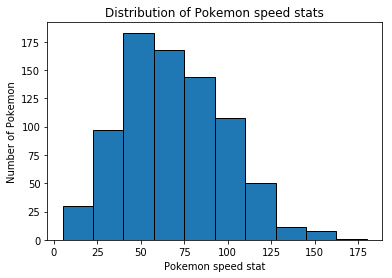

In [3]:
speed_stat = poke_array[:,SPD]
fig = plt.figure()
ax = plt.gca()
_, bins, _ = ax.hist(speed_stat, edgecolor='k')
ax.set_xlabel('Pokemon speed stat')
ax.set_ylabel('Number of Pokemon')
ax.set_title('Distribution of Pokemon speed stats')

## Exercise 2: Grouped histograms

### 2(a): Pokemon per generation

Plot a histogram of the number of Pokemon per generation.

!['2a_soln.png'](images/01_ex02a_soln.png)

**Hints**
* You can accomplish this task by either constructing the correct data and then calling ```bar``` or by a single call to ```hist```.
* The data you should be plotting should simply be the column of Pokemon generations from ```poke_array```. 
* If you are using ```hist```:
    * You will need to pass in a correct ```bin``` parameter in order to get what you want.
    * Recall that if you specify ```bins``` as a list, then you must specify the right-most boundary as well. In other words, if you want 6 bars (one for each generation), you will need 7 elements in your ```bins``` variable.
* If you are a stickler for having the generation label in the middle of your each bar, consider setting your xticks to be in the middle of each bar, and then setting your xticklabels as the generation numbers themselves.
    * ```ax.set_xticks(<locations that you want your tickmarks>)```
    * ```ax.set_xticklabels(<labels at your tickmarks>)```
    * If you are not using ```ax``` and instead using ```plt```, this can be accomplished in a single call to ```plt.xticks(<locations>, <labels>)```.

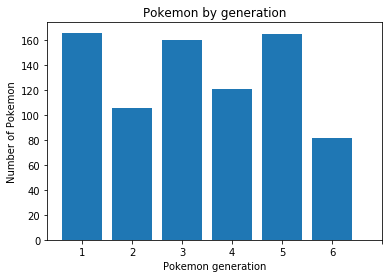

In [9]:
poke_gens = poke_array[:,GEN]
x_gens = np.arange(1,np.amax(poke_gens)+2)
fig = plt.figure()
ax = plt.gca()
ax.hist(poke_gens, bins=x_gens, width=0.8)
ax.set_xlabel('Pokemon generation')
ax.set_ylabel('Number of Pokemon')
ax.set_title('Pokemon by generation')
new_xticks = x_gens + 0.4
ax.set_xticks(new_xticks)
ax.set_xticklabels(x_gens[:-1])
fig.savefig(os.path.join('images', '01_ex02a_soln.png'))

### 2(b): Pokemon generation with dual typing
Plot a clustered bar graph of Pokemon generations, where one group is single-typed Pokemon and the other is dual-typed Pokemon. For an example on how to plot clustered bar graphs, take a look at the ```barchart_demo.py``` example on the [Matplotlib website](https://matplotlib.org/examples/api/barchart_demo.html).

Your plot should look like the following one:

!['image'](images/01_ex2b_soln.png)

**Hints:**
* You might need to make explicit calls to ```np.histogram()``` and then call ```ax.bar()``` for each data series. This is because if you look at the ```barchart_demo``` example in Matplotlib, the clustered bar graph is created by playing around with the offsets of your bars. This is best done through ```ax.bar()```, since ```ax.hist()``` auto-decides your bar offsets and then provides very little flexibility afterwards.
* If a pokemon is only single-typed, its TYPE2 field is -1.
* You can get only the generation counts of single-typed Pokemon (and similarly dual-typed Pokemon) by using boolean indexing. Keep in mind that the generation column and the type 2 column is the same length, so you can boolean index by ```gen_col[some boolean for checking type 2 doesn't exist]``` which will return an array whose values are the generations of only the pokemon for which the boolean array evaluated to true.
* You should make sure that the bins that you use for both data series are consistent.
* You should make sure that the bins that you use for both data series cover the entire range of both single- and dual-type Pokemon.
* Keep in mind the x-location parameter to ```ax.bar()``` must be the same length as the y-location parameter. This is different from ```np.histogram()``` and ```ax.hist()```, where bins must be one element longer than your desired number of bars.
* The default alignment for ```ax.bar()``` is ```align='center'```, where the x-location parameter is the center of your bar. To have the x-locations be the leftmost edge, set ```align='edge'```.
* To show a legend that floats outside of the plot area, call ```fig.legend()``` (as opposed to ```ax.legend()```).

Save your plot as ```images/01_ex02b.pdf```.

[1 2 3 4 5 6 7]
[88 51 78 54 83 32]


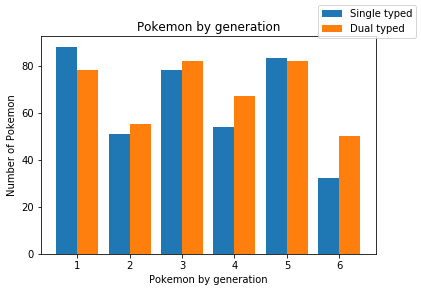

In [10]:
poke_gens = poke_array[:,GEN]
poke_type2 = poke_array[:,TYPE2]
gen_single = poke_gens[poke_type2 == -1]
gen_dual = poke_gens[poke_type2 != -1]


gen_type1, _ = np.histogram(gen_single, bins=x_gens)
gen_type2, _ = np.histogram(gen_dual, bins=x_gens)
print(x_gens)
print(gen_type1)

fig = plt.figure()
ax = plt.gca()
ax.bar(x_gens[:-1]-0.4, gen_type1, width=0.4, align='edge', label='Single typed')
ax.bar(x_gens[:-1], gen_type2, width=0.4, align='edge', label='Dual typed')
ax.set_xlabel('Pokemon by generation')
ax.set_ylabel('Number of Pokemon')
fig.legend()
ax.set_title('Pokemon by generation')
fig.savefig(os.path.join('images', '01_ex2b_soln.png'))

## Exercise 3: The line plot

### 3(a): Line plot of all six stats (HP, Attack, Defense, Special Attack, Special Defense, and Speed) over generations.

Your image should look like this.

![01_ex03a_soln.png](images/01_ex03a_soln.png)

**Hints**:
* Consider looping over the data once for constructing the means and standard deviations for all statistics over generations and saving them into arrays. And then you can use those arrays to plot both this exercise and the next exercises.
* You can set a legend below the plot with the ```set_legend()``` function defined below.

Save your plot as ```images/01_ex03a.pdf```.

In [11]:
def set_legend(ax, labels):
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=len(labels))

In [12]:
num_stats = 6
latest_gen = np.amax(poke_gens)
generations = np.arange(1, latest_gen+1)
stat_headers = poke_headers[STAT_START+1:]
stat_means = np.zeros((latest_gen, num_stats))
stat_stds = np.zeros(stat_means.shape)
for i, gen in enumerate(generations):
    bool_gen = poke_gens == gen
    curr_means = np.mean(poke_array[bool_gen,STAT_START:], axis=0)
    curr_stds = np.std(poke_array[bool_gen,STAT_START:], axis=0)
    stat_means[i,:] = curr_means[1:]
    stat_stds[i,:] = curr_stds[1:]

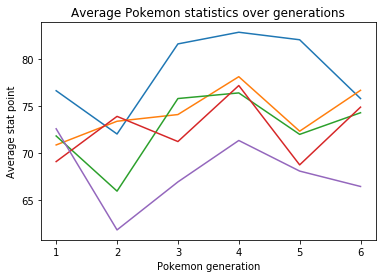

In [14]:
fig = plt.figure()
ax = plt.gca()
ax.plot(generations, stat_means[:,1:])
ax.set_xlabel('Pokemon generation')
ax.set_ylabel('Average stat point')
ax.set_title('Average Pokemon statistics over generations')
fig.savefig(os.path.join('images', '01_ex03a_soln.png'))

### 3(b): Error Bars
Recreate the following image, which plots the mean (with standard deviation error bars) of total stats over generations.

!['asdf'](images/01_ex3b_soln.png)

**Hints**
* ```capsize``` sets the size of the caps of the errorbars.
* An example of how to draw errorbars is here: https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html

Save your image as ```images/01_ex03b.pdf```.


!['asdf'](images/01_ex3b_soln.png)


In [ ]:
totals_mean = stat_means[:,0]
totals_std = stat_stds[:,0]
fig = plt.figure()
ax = plt.gca()
ax.errorbar(generations, totals_mean, yerr=totals_std, capsize=5)
ax.set_xlabel('Pokemon generation')
ax.set_ylabel('Mean of total statistic')
ax.set_title('Average Pokemon total statistic over generations (+/- 1 stdev)')
plt.show()
fig.savefig(os.path.join('images', '01_ex3b_soln.png'))

## Exercise 4: The boxplot

Plot a series of boxplots, one per type, that depict a stat of your choosing for all non-legendary Pokemon of that type. Then, plot the legendary Pokemon of that type as single points using ```ax.scatter```. Note that you can mix any combination of plotting series in Matplotlib; we'll get more into this next time.

Your plot should look like the following one:

![01_ex4_soln.png](images/01_ex4_soln.png)


**Hints**
* Like during lecture, you can count a Pokemon as a type if that type is its primary or secondary type. So the total number of points will be more than the actual Pokemon.
* ```ax.scatter()``` requires ```x``` and ```y``` to be the same size. You might want to plot these as you are iterating through the different Pokemon types.
* You can set the figure size when you create the figure with ```plt.figure(figsize=(8,10))```.

Save your image as ```images/01_ex04.pdf```.

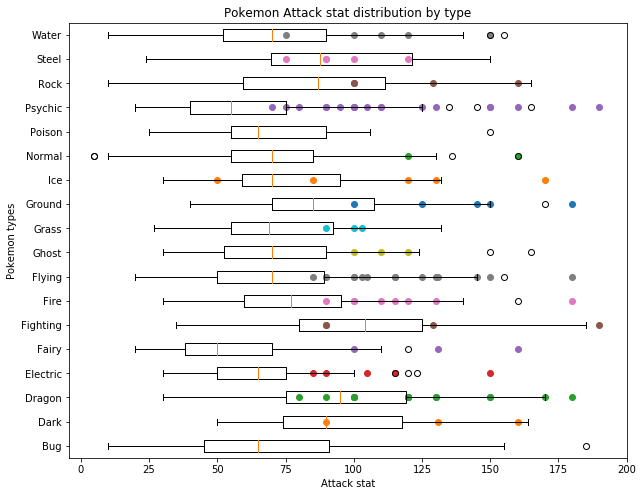

In [25]:
fig = plt.figure(figsize=(10,8))
ax = plt.gca()

speed_stats = []
stat_ind = ATK
legendary_speed_stats = []
for i, poke_type in enumerate(poke_types):
    combo_type = np.logical_or(poke_array[:,TYPE1] == i, poke_array[:,TYPE2] == i)
    speed_stats.append(poke_array[np.logical_and(combo_type, poke_array[:,LEGENDARY] == 0), stat_ind])
    legendary_type_stats = poke_array[np.logical_and(combo_type, poke_array[:,LEGENDARY] == 1), stat_ind]
    ax.scatter(legendary_type_stats, (i+1)*np.ones(legendary_type_stats.shape), label=poke_type)

ax.boxplot(speed_stats, whis=1.5, labels=poke_types, vert=False)
ax.set_ylabel('Pokemon types')
ax.set_xlabel('{} stat'.format(poke_headers[stat_ind]))
ax.set_title('Pokemon {} stat distribution by type'.format(poke_headers[stat_ind]))

fig.savefig(os.path.join('images', '01_ex4_soln.png'))
plt.show()

## Submission

Save and upload all of your pdfs in addition to your code.